In [2]:
import pandas as pd

df = pd.read_csv('titanic.csv', encoding='utf-8')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#운임 (fare)을 많이 낸 사람은 몇명이고, 남자와 여자 몇명씩 많이 냈는지 확인
q3_Fare = df['Fare'].quantile(q=0.75)
q1_Fare = df['Fare'].quantile(q=0.25)
iqr_Fare = q3_Fare - q1_Fare

upper_fare = q3_Fare + iqr_Fare * 1.5
lower_fare = q1_Fare - iqr_Fare * 1.5

# df_iqr_temp = df1[(df1['Fare'] < upper_fare) & (df1['Fare'] > lower_fare)]
print(f'상한값: {upper_fare}')
print(f'하한값: {lower_fare}')

print("----------------------------------------------------")

print(len(df['Fare'] > upper_fare))
print(len(df['Fare'] < lower_fare))



output1 = df[df['Fare'] > upper_fare]
output2 = df[df['Fare'] < lower_fare]

print("----------------------------------------------------")

print(len(output1))
print(len(output2))


# df_iqr_temp['Fare'].plot()

상한값: 65.6344
하한값: -26.724
----------------------------------------------------
891
891
----------------------------------------------------
116
0


In [5]:
sum(output1['Sex'] == 'male')

46

In [6]:
sum(output1['Sex'] == 'female')

70

<Axes: >

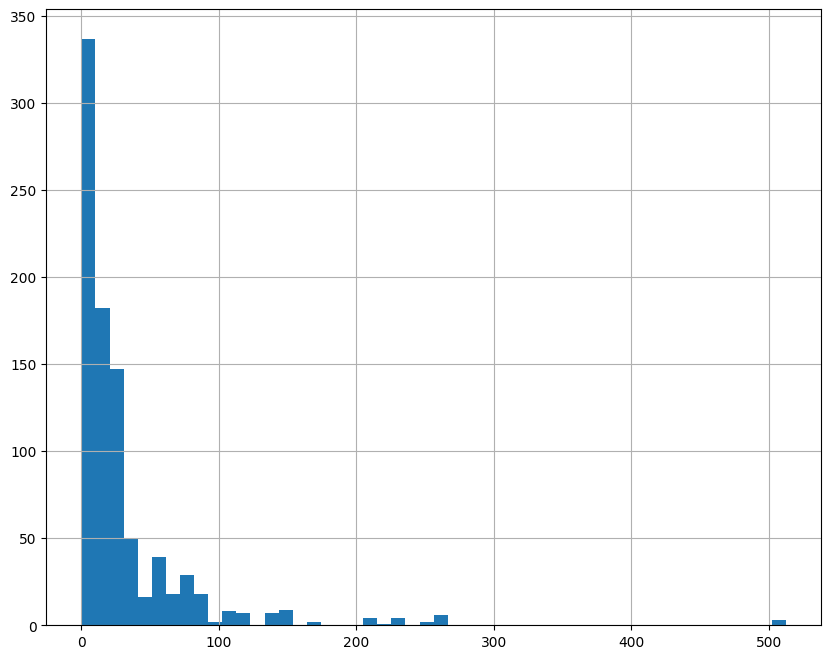

In [8]:
df['Fare'].hist(bins=50, figsize=(10,8))